In [1]:
import os
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical

from matplotlib import pyplot as plt
import argparse
import bcolz
from VisionModel import *

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
mpath =  os.getcwd()
train_data_dir= mpath + '/data/train'
validation_data_dir= mpath + '/data/valid'
test_data_dir= mpath + '/data/test/'
saved_dir = mpath + '/saved/'
results_dir = mpath + '/results/'

In [3]:
tf_features = "load"
load_topmodel = "fresh"
batch_norm = "yes"
num_epoch = 1
learn_rate = 0.01
test_only = False


In [4]:
trainedModel = VisionTrainedModel(train_data_dir,validation_data_dir,test_data_dir,saved_dir)

In [5]:
trainedModel.createDataGen()

Found 23000 images belonging to 2 classes.
createTrainGen
Found 2000 images belonging to 2 classes.
createValGen
Found 12500 images belonging to 1 classes.
createTestGen


In [6]:
if(tf_features == "fresh"):
        print("trainedModel predicting ")
        trainedModel.predictGenerator()
        trainedModel.saveFeatures()
else:
        print("trainedModel loading features")
        trainedModel.loadFeatures()

trainedModel loading features


In [7]:
train_output, val_output, test_output = trainedModel.getFeatures()
val_gen = trainedModel.getValGen()
train_labels = trainedModel.getTrainLabels()
val_labels = trainedModel.getValLabels()

In [8]:
topModel = VisionTopModel()


if(load_topmodel == "load"):
        topModel.loadModel(saved_dir , 'dogs1.h5')
#       topModel.setLearningRate(learn_rate)
else:
        topModel.flatten(trainedModel.getFeaturesShape())

        if(batch_norm == "yes"):
                topModel.addFC(1024)
        else:
                topModel.addFC(1024,batch_norm=False)

        topModel.addClassificationLayer(trainedModel.getNumClasses())
topModel.compileModel(lr=learn_rate)


addFC add batch norm 


In [10]:
if(test_only == False):
        topModel.fit(train_output, train_labels,val_output,val_labels,nbepoch=num_epoch, batch=32)
        #topModel.saveModel(saved_dir , 'dogs1.h5')


Train on 23000 samples, validate on 2000 samples
Epoch 1/1
23000/23000 [==============================] - 17s - loss: 0.1568 - acc: 0.9370 - val_loss: 0.2160 - val_acc: 0.9245


In [11]:
pred = topModel.predict(test_output)

test_gen = trainedModel.getTestGen()
test_images = test_gen.filenames

In [12]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    plt.show()
    

In [16]:
def plots_idx(idx, titles=None):
    plots([image.load_img(test_data_dir + test_images[i]) for i in idx], titles=titles)


In [17]:
our_predictions = pred[:,1]
our_labels = np.around(our_predictions,3)

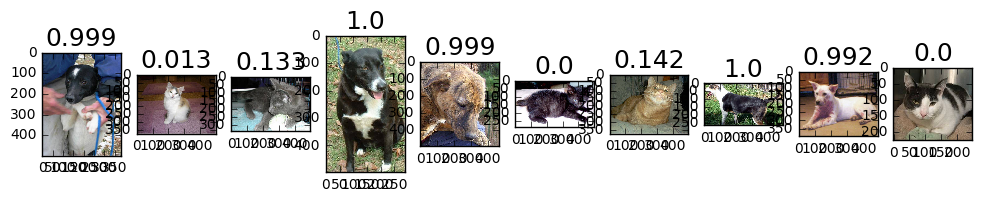

In [18]:
idx = range(10)
plots_idx(idx,our_labels[:10])

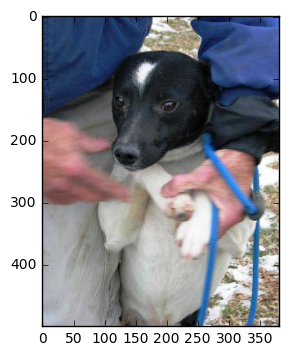

In [19]:
plt.imshow(image.load_img(test_data_dir+test_images[0]))
plt.show()